<a href="https://colab.research.google.com/github/Utpal-Mishra/Python-Glass-Quality-Prediction/blob/main/GlassQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING

###LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
from matplotlib import cm as cm
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

import time
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

###MOUNTING DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


###IMPORT TRAINING DATA

In [ ]:
path = "/content/drive/My Drive/Glass Quality Prediction/Train.csv"
train = pd.read_csv(path)
print(train.shape)
train.head()

(1358, 16)


,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.09927,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.20562,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.12060,0,0,0,0,0,2
3,0,1,123,35,41,220,1705580,1705604,6803,6803.77862,0,0,1,0,0,1
4,1,0,138,69,462,466,1088124,1086579,251,251.40194,0,0,0,0,0,2


In [ ]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445290,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335953,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367815,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


###IMPORT TESTING DATA

In [ ]:
path = "/content/drive/My Drive/Glass Quality Prediction/Test.csv"
test = pd.read_csv(path)
print(test.shape)
test.head()

(583, 15)


,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
0,1,0,123,65,33,54,1646439,1646893,632,632.39175,0,1,0,0,0
1,0,1,158,99,125,132,189874,189529,421,421.92861,0,0,0,0,0
2,0,1,120,35,64,75,12986873,12986862,272,272.21221,1,0,0,0,0
3,0,1,130,39,57,177,309634,310824,3312,3312.31058,0,0,1,0,0
4,1,0,142,75,23,79,5368307,5367467,862,862.49918,0,0,0,0,0


#DATA VISUALIZATION

###TRAINING DATA 

NULL VALUES CHECK UP 

In [ ]:
train.isnull().values.any()

False

In [ ]:
train.isnull().sum().sum()

0

In [ ]:
#train.fillna(0, inplace = True)
#train.isnull().values.any()
#train.isnull().sum().sum()

CLASS LABEL ANALYSIS

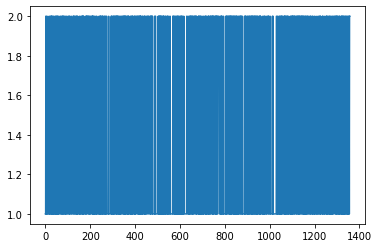

In [ ]:
train['class'].plot()

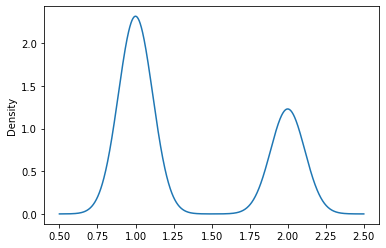

In [ ]:
train['class'].plot.density()

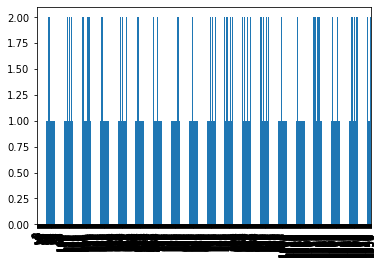

In [ ]:
train['class'].plot.bar()

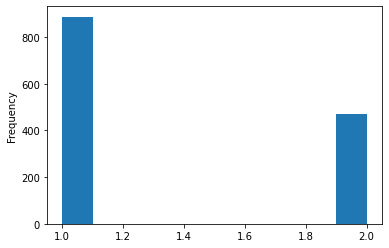

In [ ]:
train['class'].plot.hist()

CLASS LABEL VALUE COUNT ANALYSIS

In [ ]:
train['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

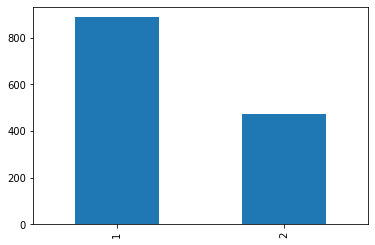

In [ ]:
train['class'].value_counts().plot.bar()

TRAINING CORRELATION MATRIX

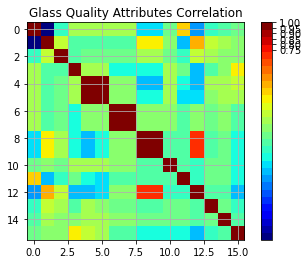

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(train.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Glass Quality Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

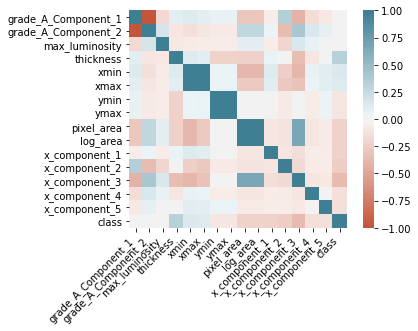

In [ ]:
corr = train.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

###TESTING DATA 

NULL VALUES CHECK UP 

In [ ]:
test.isnull().values.any()

False

In [ ]:
test.isnull().sum().sum()

0

In [ ]:
#test.fillna(0, inplace = True)
#test.isnull().values.any()
#test.isnull().sum().sum()

TESTING CORRELATION MATRIX

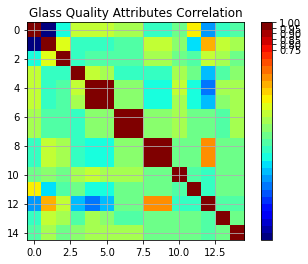

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(test.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Glass Quality Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

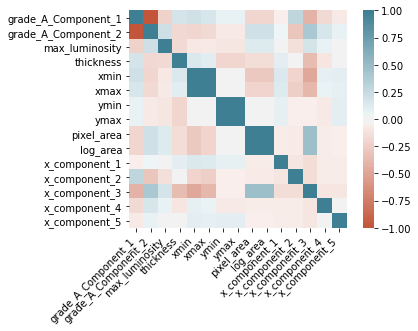

In [ ]:
corr = test.corr()
ax = sns.heatmap(corr, vmin =- 1, vmax = 1, center = 0, 
                  cmap = sns.diverging_palette(20, 220, n=200),
                  square = True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right'
);

#DATA SPLITTING

TRAINING AND VALIDATION DATA

In [ ]:
Y = train['class'].values
X = train.drop('class', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20)

In [ ]:
print("X_train.shape: ",X_train.shape, "X_test.shape: ",X_test.shape,"Y_train.shape: ", Y_train.shape, "Y_test.shape: ",Y_test.shape)

X_train.shape:  (1086, 15) X_test.shape:  (272, 15) Y_train.shape:  (1086,) Y_test.shape:  (272,)


TESTING DATA

In [ ]:
XTest = test
XTest.shape

(583, 15)

#MODELLING

###ENSEMBLE MODELLING USING CROSS VALIDATION

In [ ]:
models_list = []
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('SVM', SVC(C=1.7, kernel='rbf'))) 
models_list.append(('NB', GaussianNB()))
models_list.append(('DT', DecisionTreeClassifier(criterion='entropy')))
models_list.append(('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)))
models_list.append(('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2)))
models_list.append(('RF', RandomForestClassifier(criterion='entropy')))
models_list.append(('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)))
models_list.append(('GB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)))
models_list.append(('ADB', AdaBoostClassifier()))

EVALUATION = {}

In [ ]:
num_folds = 10
results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

KNN: 0.581057 (0.027827) (run time: 0.094559)
SVM: 0.645336 (0.045423) (run time: 0.497910)
NB: 0.570982 (0.042587) (run time: 0.015431)
DT: 0.834191 (0.040427) (run time: 0.126720)
BAG: 0.804723 (0.034026) (run time: 0.291694)
ET: 0.842482 (0.024167) (run time: 0.165897)
RF: 0.850832 (0.028180) (run time: 3.300597)
GB: 0.838787 (0.036336) (run time: 1.257054)
GB: 0.848046 (0.037192) (run time: 1.048408)
ADB: 0.834183 (0.037163) (run time: 1.299385)


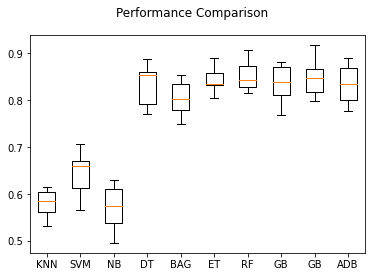

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

PIPELINING

In [ ]:
# Standardize the dataset
pipelines = []

pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledSVC', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=1.7, kernel='rbf'))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', StandardScaler()),('DT', DecisionTreeClassifier(criterion='entropy'))])))
pipelines.append(('ScaledBAG', Pipeline([('Scaler', StandardScaler()),('BAG', BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2))])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(criterion='entropy'))])))
pipelines.append(('ScaledGB', Pipeline([('Scaler', StandardScaler()),('GB', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('GB', XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75))])))
pipelines.append(('ScaledADB', Pipeline([('Scaler', StandardScaler()),('ADB', AdaBoostClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledKNN: 0.833299 (0.033522) (run time: 0.112038)
ScaledSVC: 0.840664 (0.033138) (run time: 0.313874)
ScaledNB: 0.802999 (0.032634) (run time: 0.030741)
ScaledDT: 0.825858 (0.048574) (run time: 0.137969)
ScaledBAG: 0.765962 (0.056165) (run time: 0.289177)
ScaledET: 0.846194 (0.025991) (run time: 0.175164)
ScaledRF: 0.839772 (0.030584) (run time: 3.255133)
ScaledGB: 0.838787 (0.036336) (run time: 1.247128)
ScaledXGB: 0.851750 (0.034525) (run time: 0.971629)
ScaledADB: 0.834183 (0.037163) (run time: 1.264963)


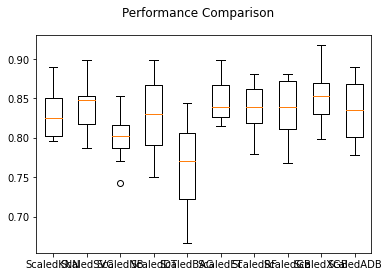

In [ ]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

###SVM

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.845268 using {'C': 2.0, 'kernel': 'rbf'}
0.802022 (0.041028) with: {'C': 0.1, 'kernel': 'linear'}
0.800212 (0.033079) with: {'C': 0.1, 'kernel': 'poly'}
0.816743 (0.028841) with: {'C': 0.1, 'kernel': 'rbf'}
0.805641 (0.046796) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.813082 (0.036791) with: {'C': 0.3, 'kernel': 'linear'}
0.801181 (0.033791) with: {'C': 0.3, 'kernel': 'poly'}
0.821339 (0.029322) with: {'C': 0.3, 'kernel': 'rbf'}
0.785398 (0.047908) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.820421 (0.030779) with: {'C': 0.5, 'kernel': 'linear'}
0.804850 (0.033512) with: {'C': 0.5, 'kernel': 'poly'}
0.830530 (0.035900) with: {'C': 0.5, 'kernel': 'rbf'}
0.771534 (0.041971) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.825926 (0.031760) with: {'C': 0.7, 'kernel': 'linear'}
0.809446 (0.033375) with: {'C': 0.7, 'kernel': 'poly'}
0.831448 (0.036116) with: {'C': 0.7, 'kernel': 'rbf'}
0.772511 (0.042738) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.826860 (0.034092) with: {'C': 0.9, 'kernel': 'linear'

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
SVM = SVC(C=1.7, kernel='rbf')
start = time.time()
SVM.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.035850


In [ ]:
# estimate accuracy on validation dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
SVMPred = SVM.predict(X_test_scaled)

print(confusion_matrix(Y_test, SVMPred))

[[160  22]
 [ 18  72]]


In [ ]:
accuracy = accuracy_score(Y_test, SVMPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, SVMPred))

Accuracy: 85.29%
              precision    recall  f1-score   support

           1       0.90      0.88      0.89       182
           2       0.77      0.80      0.78        90

    accuracy                           0.85       272
   macro avg       0.83      0.84      0.84       272
weighted avg       0.85      0.85      0.85       272



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
SVMPred = SVM.predict(XTest_scaled)

EVALUATION['SVM'] = list(SVMPred)

###LinearSVC

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
LSVC = LinearSVC()
start = time.time()
LSVC.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.053529


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
LSVCPred = LSVC.predict(X_test_scaled)
LSVC.fit(X_test_scaled, Y_test)
print(confusion_matrix(Y_test, LSVCPred))

[[142  40]
 [ 15  75]]


In [ ]:
accuracy = accuracy_score(Y_test, LSVCPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, LSVCPred))

Accuracy: 79.78%
              precision    recall  f1-score   support

           1       0.90      0.78      0.84       182
           2       0.65      0.83      0.73        90

    accuracy                           0.80       272
   macro avg       0.78      0.81      0.78       272
weighted avg       0.82      0.80      0.80       272



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
LSVCPred = LSVC.predict(XTest_scaled)

EVALUATION['LinearSVC'] = list(LSVCPred)

###CALIBERATED CLASSIFIER

In [ ]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
CCCV = CalibratedClassifierCV(base_estimator = LSVC)
start = time.time()
CCCV.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.208222


In [ ]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
CCCVPred = CCCV.predict(X_test_scaled)
CCCV.fit(X_test_scaled, Y_test)
print(confusion_matrix(Y_test, CCCVPred))

[[145  37]
 [ 15  75]]


In [ ]:
accuracy = accuracy_score(Y_test, CCCVPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, CCCVPred))

Accuracy: 80.88%
              precision    recall  f1-score   support

           1       0.91      0.80      0.85       182
           2       0.67      0.83      0.74        90

    accuracy                           0.81       272
   macro avg       0.79      0.82      0.80       272
weighted avg       0.83      0.81      0.81       272



In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    XTest_scaled = scaler.transform(XTest)
CCCVPred = CCCV.predict(XTest_scaled)

EVALUATION['CaliberatedVC'] = list(CCCVPred)

###NB

In [ ]:
NB = GaussianNB()
NB.fit(X_train,Y_train)
NBPred = NB.predict(X_test)
NB.score(X_test, Y_test)
NB.fit(X_test, Y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
cm = confusion_matrix(Y_test, NBPred)
print(cm)

[[ 70 112]
 [ 17  73]]


In [ ]:
accuracy = accuracy_score(Y_test, NBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, NBPred))

Accuracy: 52.57%
              precision    recall  f1-score   support

           1       0.80      0.38      0.52       182
           2       0.39      0.81      0.53        90

    accuracy                           0.53       272
   macro avg       0.60      0.60      0.53       272
weighted avg       0.67      0.53      0.52       272



In [ ]:
NBPred = NB.predict(XTest)

EVALUATION['NB'] = list(NBPred)

###DECISION TREE

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(X_train,Y_train)
DTPred = DT.predict(X_test)
DT.score(X_test, Y_test)
DT.fit(X_test, Y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cm = confusion_matrix(Y_test, DTPred)
print(cm)

[[158  24]
 [ 17  73]]


In [ ]:
accuracy = accuracy_score(Y_test, DTPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, DTPred))

Accuracy: 84.93%
              precision    recall  f1-score   support

           1       0.90      0.87      0.89       182
           2       0.75      0.81      0.78        90

    accuracy                           0.85       272
   macro avg       0.83      0.84      0.83       272
weighted avg       0.85      0.85      0.85       272



In [ ]:
DTPred = DT.predict(XTest)

EVALUATION['DT'] = list(DTPred)

###DECISON TREE BAGGING

In [ ]:
Bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5)
Bagging.fit(X_train, Y_train)
BPred = Bagging.predict(X_test)
Bagging.score(X_test, Y_test)

0.8272058823529411

In [ ]:
cm = confusion_matrix(Y_test, BPred)
print(cm)

[[166  16]
 [ 31  59]]


In [ ]:
accuracy = accuracy_score(Y_test, BPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, BPred))

Accuracy: 82.72%
              precision    recall  f1-score   support

           1       0.84      0.91      0.88       182
           2       0.79      0.66      0.72        90

    accuracy                           0.83       272
   macro avg       0.81      0.78      0.80       272
weighted avg       0.82      0.83      0.82       272



In [ ]:
BPred = Bagging.predict(XTest)

EVALUATION['Bagging'] = list(BPred)

###EXTRA TREE CLASSFIER

In [ ]:
ET = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
ET.fit(X_train, Y_train)
ET.score(X_train, Y_train)
ETPred = ET.predict(X_test)
ET.score(X_test, Y_test)

0.8455882352941176

In [ ]:
cm = confusion_matrix(Y_test, ETPred)
print(cm)

[[161  21]
 [ 21  69]]


In [ ]:
accuracy = accuracy_score(Y_test, ETPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ETPred))

Accuracy: 84.56%
              precision    recall  f1-score   support

           1       0.88      0.88      0.88       182
           2       0.77      0.77      0.77        90

    accuracy                           0.85       272
   macro avg       0.83      0.83      0.83       272
weighted avg       0.85      0.85      0.85       272



In [ ]:
ETPred = ET.predict(XTest)

EVALUATION['ExtraTree'] = list(ETPred)

###GRADIANT DESCENT CLASSIFIER

In [ ]:
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
GB.fit(X_train, Y_train)
GBPred = GB.predict(X_test)
#GB.score(X_test, Y_test)
GB.fit(X_test, Y_test)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, GBPred)
print(cm)

[[164  18]
 [ 17  73]]


In [ ]:
accuracy = accuracy_score(Y_test, GBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, GBPred))

Accuracy: 87.13%
              precision    recall  f1-score   support

           1       0.91      0.90      0.90       182
           2       0.80      0.81      0.81        90

    accuracy                           0.87       272
   macro avg       0.85      0.86      0.86       272
weighted avg       0.87      0.87      0.87       272



In [ ]:
GBPred = GB.predict(XTest)

EVALUATION['GB'] = list(GBPred)

###RANDOM FOREST

In [ ]:
RF = RandomForestClassifier(criterion='entropy', random_state=0)
RF.fit(X_train,Y_train)
RFPred = RF.predict(X_test)
RF.score(X_test, Y_test)
RF.fit(X_test, Y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
cm = confusion_matrix(Y_test, RFPred)
print(cm)

[[161  21]
 [ 13  77]]


In [ ]:
accuracy = accuracy_score(Y_test, RFPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, RFPred))

Accuracy: 87.50%
              precision    recall  f1-score   support

           1       0.93      0.88      0.90       182
           2       0.79      0.86      0.82        90

    accuracy                           0.88       272
   macro avg       0.86      0.87      0.86       272
weighted avg       0.88      0.88      0.88       272



In [ ]:
RFPred = RF.predict(XTest)

EVALUATION['RF'] = list(RFPred)

###XGBOOST

In [ ]:
XGB = XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75)
XGB.fit(X_train, Y_train, verbose=False)
XGBPred = XGB.predict(X_test)
XGB.fit(X_test, Y_test, verbose=False)
#XGB.score(X_test, Y_test)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.75, verbosity=1)

In [ ]:
cm = confusion_matrix(Y_test, XGBPred)
print(cm)

[[161  21]
 [ 16  74]]


In [ ]:
accuracy = accuracy_score(Y_test, XGBPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, XGBPred))

Accuracy: 86.40%
              precision    recall  f1-score   support

           1       0.91      0.88      0.90       182
           2       0.78      0.82      0.80        90

    accuracy                           0.86       272
   macro avg       0.84      0.85      0.85       272
weighted avg       0.87      0.86      0.86       272



In [ ]:
#XGBPred = XGB.predict(XTest)
#EVALUATION['XGB'] = list(XGBPred)

###ADABOOST

In [ ]:
ADAB = AdaBoostClassifier()
ADAB.fit(X_train, Y_train)
ADABPred = ADAB.predict(X_test)
ADAB.fit(X_test, Y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [ ]:
cm = confusion_matrix(Y_test, ADABPred)
print(cm)

[[164  18]
 [ 16  74]]


In [ ]:
accuracy = accuracy_score(Y_test, ADABPred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(classification_report(Y_test, ADABPred))

Accuracy: 87.50%
              precision    recall  f1-score   support

           1       0.91      0.90      0.91       182
           2       0.80      0.82      0.81        90

    accuracy                           0.88       272
   macro avg       0.86      0.86      0.86       272
weighted avg       0.88      0.88      0.88       272



In [ ]:
ADABPred = ADAB.predict(XTest)

EVALUATION['ADB'] = list(ADABPred)

###ANN

In [ ]:
model = Sequential()

model.add(Dense(units = 32, activation = 'relu', input_shape=(15,)))
model.add(Dense(units = 256, activation = 'relu'))
#model.add(Dense(units = 1024, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                512       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               8448      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 9,217
Trainable params: 9,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size = 10, nb_epoch = 1000)

Epoch 1/1000
1086/1086 [==============================] - 0s 448us/step - loss: -2705082.6246 - accuracy: 0.6455
Epoch 2/1000
1086/1086 [==============================] - 0s 154us/step - loss: -27675694.6512 - accuracy: 0.6492
Epoch 3/1000
1086/1086 [==============================] - 0s 129us/step - loss: -119901821.7965 - accuracy: 0.6492
Epoch 4/1000
1086/1086 [==============================] - 0s 131us/step - loss: -331097594.8425 - accuracy: 0.6492
Epoch 5/1000
1086/1086 [==============================] - 0s 129us/step - loss: -720520122.5935 - accuracy: 0.6492
Epoch 6/1000
1086/1086 [==============================] - 0s 129us/step - loss: -1338730084.6409 - accuracy: 0.6492
Epoch 7/1000
1086/1086 [==============================] - 0s 130us/step - loss: -2208006608.6041 - accuracy: 0.6492
Epoch 8/1000
1086/1086 [==============================] - 0s 125us/step - loss: -3344715347.7716 - accuracy: 0.6492
Epoch 9/1000
1086/1086 [==============================] - 0s 126us/step - loss: 

In [ ]:
ANNPred = model.predict(X_test)

ANN_Pred = []
for i in ANN_Pred:
  for k in i:
    ANN_Pred.append(int(k))
  
ANNPred = np.array(ANN_Pred) 

cm = confusion_matrix(Y_test, ANNPred)
print(cm)

ValueError: ignored

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, ANNPred))
print(classification_report(Y_test, ANNPred))

ValueError: ignored

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_test, Y_test, batch_size = 10, nb_epoch = 1000)

Epoch 1/1000
272/272 [==============================] - 0s 477us/step - loss: -1363328660329171.0000 - accuracy: 0.6691
Epoch 2/1000
272/272 [==============================] - 0s 126us/step - loss: -1364295917718347.2500 - accuracy: 0.6691
Epoch 3/1000
272/272 [==============================] - 0s 128us/step - loss: -1365266155993208.5000 - accuracy: 0.6691
Epoch 4/1000
272/272 [==============================] - 0s 132us/step - loss: -1366234845644679.5000 - accuracy: 0.6691
Epoch 5/1000
272/272 [==============================] - 0s 125us/step - loss: -1367176756052931.7500 - accuracy: 0.6691
Epoch 6/1000
272/272 [==============================] - 0s 127us/step - loss: -1368146551612837.5000 - accuracy: 0.6691
Epoch 7/1000
272/272 [==============================] - 0s 124us/step - loss: -1369054576948404.7500 - accuracy: 0.6691
Epoch 8/1000
272/272 [==============================] - 0s 120us/step - loss: -1369952101103736.5000 - accuracy: 0.6691
Epoch 9/1000
272/272 [==================

In [ ]:
ANNPred = model.predict(XTest)

ANN_Pred = []
for i in ANN_Pred:
  for k in i:
    ANN_Pred.append(int(k))
  
ANNPred = np.array(ANN_Pred) 

EVALUATION['ANN'] = list(ANNPred)

NameError: ignored

###Deep Learning

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(64, activation = 'relu', input_shape=(15,)))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
/
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1024      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 149,505
Trainable params: 149,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', verbose=1, save_best_only=True) 

In [ ]:
NN_model.fit(X_train, Y_train, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

Train on 868 samples, validate on 218 samples
Epoch 1/1000
868/868 [==============================] - 0s 272us/step - loss: 1.3422 - mean_absolute_error: 1.3422 - val_loss: 0.3807 - val_mean_absolute_error: 0.3807

Epoch 00001: val_loss improved from inf to 0.38073, saving model to Weights-001--0.38073.hdf5
Epoch 2/1000
868/868 [==============================] - 0s 129us/step - loss: 0.3433 - mean_absolute_error: 0.3433 - val_loss: 0.3807 - val_mean_absolute_error: 0.3807

Epoch 00002: val_loss improved from 0.38073 to 0.38073, saving model to Weights-002--0.38073.hdf5
Epoch 3/1000
868/868 [==============================] - 0s 125us/step - loss: 0.3433 - mean_absolute_error: 0.3433 - val_loss: 0.3807 - val_mean_absolute_error: 0.3807

Epoch 00003: val_loss did not improve from 0.38073
Epoch 4/1000
868/868 [==============================] - 0s 150us/step - loss: 0.3433 - mean_absolute_error: 0.3433 - val_loss: 0.3807 - val_mean_absolute_error: 0.3807

Epoch 00004: val_loss did not impro

In [ ]:
#NN_model.load_weights('weights.best.cnn.hdf5')

In [ ]:
#wights_file = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
#NN_model.load_weights(wights_file) 
#NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [ ]:
DL_pred = model.predict(X_test)

#Array of list of list to Array of list
DLPred = []
for i in DL_pred:
  for k in i:
    DLPred.append(int(k))
  
DLPred = np.array(DLPred) 

#PRINT
#Y_test, Y_new

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, DLPred)
print(cm)

In [ ]:
print("Accuracy score %f" % accuracy_score(Y_test, DLPred))
print(classification_report(Y_test, DLPred))

In [ ]:
NN_model.fit(X_test, Y_test, epochs=1000, batch_size=30, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
DLPred = model.predict(XTest)
DL_Pred = []
for i in DLPred:
  for k in i:
    DL_Pred.append(int(k))
  
DLPred = np.array(DL_Pred) 

In [ ]:
EVALUATION['DL'] = list(DLPred)

#EVALUATION

In [ ]:
pd.DataFrame(EVALUATION)